In [1]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data_dir = "D:/vscodepython/Statistical Calculation/Homework6_CNN/"
img_dir = "D:/vscodepython/Statistical Calculation/Homework6_CNN/image_hw6/"

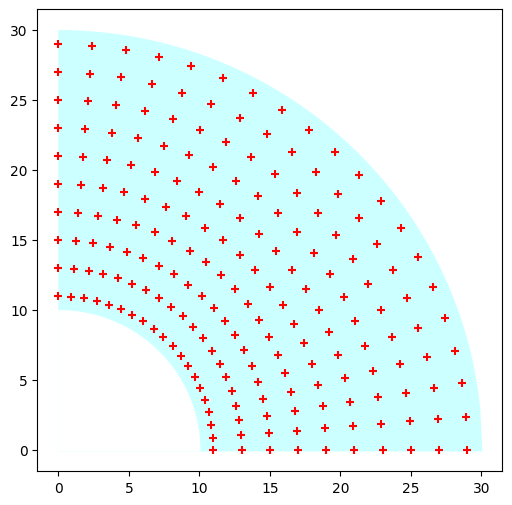

In [22]:
l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2)**2 - x **2)
f2 = lambda x: np.sqrt(l2 **2 - x **2)

plt.figure(figsize = (6, 6))
x = np.linspace(0, l1+l2, 200)
plt.fill_between(x, f1(x), 0, color = "#CCFFFF")
x = np.linspace(0, l2, 200)
plt.fill_between(x, f2(x), 0, color = "white")
# input
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1+ l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

plt.scatter(X.ravel(), Y.ravel(), marker="+", color="red")
plt.savefig(img_dir+"plot.eps", format="eps")

Root Mean square error is 0.0372
R squared = 0.9960
Loss Function = 0.0007
Number of iterations : 1502
Root Mean square error is 0.0210
R squared = 0.9988
Loss Function = 0.0003
Number of iterations : 4712
Root Mean square error is 0.0334
R squared = 0.9974
Loss Function = 0.0006
Number of iterations : 1662
Root Mean square error is 0.0204
R squared = 0.9989
Loss Function = 0.0002
Number of iterations : 3187


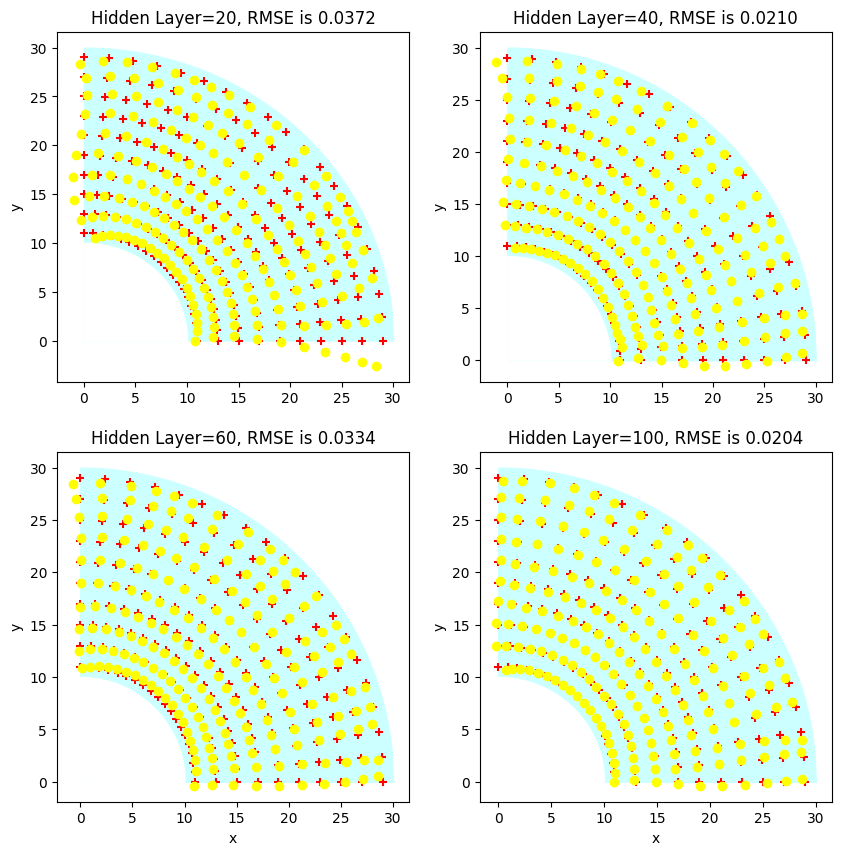

<Figure size 640x480 with 0 Axes>

In [34]:
fig, axes = plt.subplots(2, 2, figsize = [10, 10])

l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2)**2 - x **2)
f2 = lambda x: np.sqrt(l2 **2 - x **2)
#axes[0][0].figure(figsize = (6, 6))
x = np.linspace(0, l1+l2, 200)
axes[0][0].fill_between(x, f1(x), 0, color = "#CCFFFF")
x = np.linspace(0, l2, 200)
axes[0][0].fill_between(x, f2(x), 0, color = "white")
# input
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1+ l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))
axes[0][0].scatter(X.ravel(), Y.ravel(), marker="+", color="red")
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
# input output組合成矩陣
InputX = np.c_[X.ravel(), Y.ravel()] #向量合併成矩陣
OutputY = np.c_[theta1, theta2]
# 學習器設定 ---------------------------------------------------------------
v=20
hidden_layers = (v, ) #隱藏層 #逗點後留給output # 可以嘗試改變此層數
solver = "lbfgs" # the best for robot data
# solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, 
hidden_layer_sizes = hidden_layers, verbose = False,
activation = "logistic", tol=1e-6, random_state = 0) 
# default activation = ’relu’
# max_iter:遞迴最大次數 #verbose:是否列印過程(但在此solver中都不會印)
# -------------------------------------------------------------------------
mlp_reg.fit(InputX, OutputY)  # Training
# -------------------------------------------------------------------------
#擬合值 
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# 輸出換算為位置
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ----------------------------------------------------
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print("Root Mean square error is {:.4f}".format(rmse))
R_squared = mlp_reg.score(InputX, OutputY)
print("R squared = {:.4f}".format(R_squared))
LossFun = mlp_reg.loss_
print("Loss Function = {:.4f}".format(LossFun))
print("Number of iterations : {}".format(mlp_reg.n_iter_))
# ----------------------------------------------------
#show the predict data with training data
axes[0][0].scatter(x_hat, y_hat, marker="o", color="yellow")
axes[0][0].set_ylabel("y")
#plt.show()
axes[0][0].set_title("Hidden Layer={}, RMSE is {:.4f}".format(v,rmse))



# --------------------------------------------------------------------------------------
l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2)**2 - x **2)
f2 = lambda x: np.sqrt(l2 **2 - x **2)
#axes[0][1].figure(figsize = (6, 6))
x = np.linspace(0, l1+l2, 200)
axes[0][1].fill_between(x, f1(x), 0, color = "#CCFFFF")
x = np.linspace(0, l2, 200)
axes[0][1].fill_between(x, f2(x), 0, color = "white")
# input
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1+ l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))
axes[0][1].scatter(X.ravel(), Y.ravel(), marker="+", color="red")
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
# input output組合成矩陣
InputX = np.c_[X.ravel(), Y.ravel()] #向量合併成矩陣
OutputY = np.c_[theta1, theta2]
# 學習器設定 ---------------------------------------------------------------
v=40
hidden_layers = (v, ) #隱藏層 #逗點後留給output # 可以嘗試改變此層數
solver = "lbfgs" # the best for robot data
# solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, 
hidden_layer_sizes = hidden_layers, verbose = False,
activation = "logistic", tol=1e-6, random_state = 0) 
# default activation = ’relu’
# max_iter:遞迴最大次數 #verbose:是否列印過程(但在此solver中都不會印)
# -------------------------------------------------------------------------
mlp_reg.fit(InputX, OutputY)  # Training
# -------------------------------------------------------------------------
#擬合值 
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# 輸出換算為位置
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ----------------------------------------------------
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print("Root Mean square error is {:.4f}".format(rmse))
R_squared = mlp_reg.score(InputX, OutputY)
print("R squared = {:.4f}".format(R_squared))
LossFun = mlp_reg.loss_
print("Loss Function = {:.4f}".format(LossFun))
print("Number of iterations : {}".format(mlp_reg.n_iter_))
# ----------------------------------------------------
#show the predict data with training data
axes[0][1].scatter(x_hat, y_hat, marker="o", color="yellow")
axes[0][1].set_ylabel("y")
#plt.show()
axes[0][1].set_title("Hidden Layer={}, RMSE is {:.4f}".format(v,rmse))


# ----------------------------------------------------------------------------------------
l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2)**2 - x **2)
f2 = lambda x: np.sqrt(l2 **2 - x **2)
#axes[1][0].figure(figsize = (6, 6))
x = np.linspace(0, l1+l2, 200)
axes[1][0].fill_between(x, f1(x), 0, color = "#CCFFFF")
x = np.linspace(0, l2, 200)
axes[1][0].fill_between(x, f2(x), 0, color = "white")
# input
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1+ l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))
axes[1][0].scatter(X.ravel(), Y.ravel(), marker="+", color="red")
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
# input output組合成矩陣
InputX = np.c_[X.ravel(), Y.ravel()] #向量合併成矩陣
OutputY = np.c_[theta1, theta2]
# 學習器設定 ---------------------------------------------------------------
v=60
hidden_layers = (v, ) #隱藏層 #逗點後留給output # 可以嘗試改變此層數
solver = "lbfgs" # the best for robot data
# solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, 
hidden_layer_sizes = hidden_layers, verbose = False,
activation = "logistic", tol=1e-6, random_state = 0) 
# default activation = ’relu’
# max_iter:遞迴最大次數 #verbose:是否列印過程(但在此solver中都不會印)
# -------------------------------------------------------------------------
mlp_reg.fit(InputX, OutputY)  # Training
# -------------------------------------------------------------------------
#擬合值 
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# 輸出換算為位置
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ---------------------------------------------------
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print("Root Mean square error is {:.4f}".format(rmse))
R_squared = mlp_reg.score(InputX, OutputY)
print("R squared = {:.4f}".format(R_squared))
LossFun = mlp_reg.loss_
print("Loss Function = {:.4f}".format(LossFun))
print("Number of iterations : {}".format(mlp_reg.n_iter_))
# ----------------------------------------------------
#show the predict data with training data
axes[1][0].scatter(x_hat, y_hat, marker="o", color="yellow")
axes[1][0].set_xlabel("x"), axes[1][0].set_ylabel("y")
#plt.show()
axes[1][0].set_title("Hidden Layer={}, RMSE is {:.4f}".format(v,rmse))




# -----------------------------------------------------------------------------------------------------
l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2)**2 - x **2)
f2 = lambda x: np.sqrt(l2 **2 - x **2)
#axes[1][1].figure(figsize = (6, 6))
x = np.linspace(0, l1+l2, 200)
axes[1][1].fill_between(x, f1(x), 0, color = "#CCFFFF")
x = np.linspace(0, l2, 200)
axes[1][1].fill_between(x, f2(x), 0, color = "white")
# input
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1+ l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))
axes[1][1].scatter(X.ravel(), Y.ravel(), marker="+", color="red")
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
# input output組合成矩陣
InputX = np.c_[X.ravel(), Y.ravel()] #向量合併成矩陣
OutputY = np.c_[theta1, theta2]
# 學習器設定 ---------------------------------------------------------------
v=100
hidden_layers = (v, ) #隱藏層 #逗點後留給output # 可以嘗試改變此層數
solver = "lbfgs" # the best for robot data
# solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, 
hidden_layer_sizes = hidden_layers, verbose = False,
activation = "logistic", tol=1e-6, random_state = 0) 
# default activation = ’relu’
# max_iter:遞迴最大次數 #verbose:是否列印過程(但在此solver中都不會印)
# -------------------------------------------------------------------------
mlp_reg.fit(InputX, OutputY)  # Training
# -------------------------------------------------------------------------
#擬合值 
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# 輸出換算為位置
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ----------------------------------------------------
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print("Root Mean square error is {:.4f}".format(rmse))
R_squared = mlp_reg.score(InputX, OutputY)
print("R squared = {:.4f}".format(R_squared))
LossFun = mlp_reg.loss_
print("Loss Function = {:.4f}".format(LossFun))
print("Number of iterations : {}".format(mlp_reg.n_iter_))
# ----------------------------------------------------
#show the predict data with training data
axes[1][1].scatter(x_hat, y_hat, marker="o", color="yellow")
axes[1][1].set_xlabel("x"), axes[1][1].set_ylabel("y")
axes[1][1].set_title("Hidden Layer={}, RMSE is {:.4f}".format(v,rmse))

plt.show() 
plt.savefig(img_dir+"hidden.png", format="png")


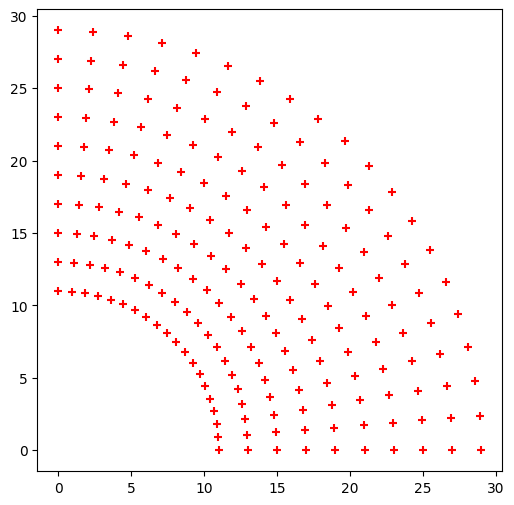

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

l1, l2 = 20, 10
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

plt.figure(figsize=(6, 6))
plt.scatter(X.ravel(), Y.ravel(), marker = "+", color = "red")

# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

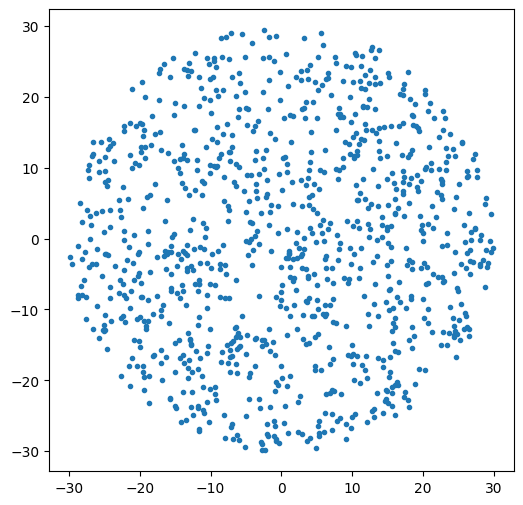

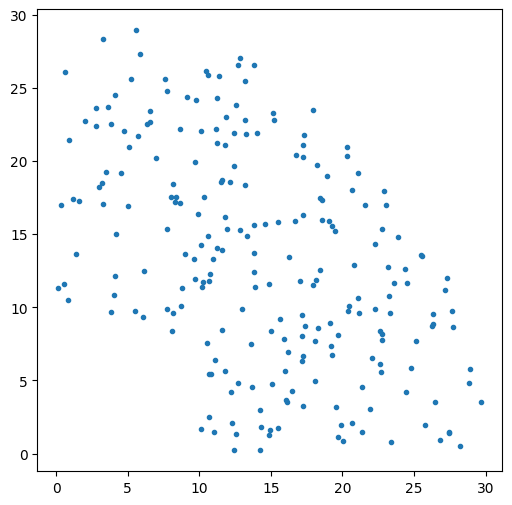

In [21]:
from scipy.stats import uniform
N = 100
radius_in, radius_out =10, 30
X = uniform.rvs(loc = 0, scale = radius_out, size=(N, 2))
d = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
Idx = (d < radius_out) & (d > radius_in)
TrainData = X[(d < radius_out) & (d > radius_in), :]

import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt
def randsphere(center, radius, n_per_sphere):
  r = radius
  ndim = center.size
  x = np.random.normal(size=(n_per_sphere, ndim))
  ssq = np.sum(x ** 2, axis=1)
  fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
  frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
  p = center + np.multiply(x, frtiled)
  return p

#　------------------------------------------
p = randsphere(np.array([0, 0]), 30, 1000)
plt.figure(figsize = (6, 6))
plt.scatter(p[:, 0], p[:, 1], marker = ".")
plt.show()

# ------------------------------------------

# 找扇形內的資料點
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # 扇形內
plt.figure(figsize = (6, 6))
plt.scatter(p[:, 0], p[:, 1], marker = ".")
plt.show()

# 如何畫圓框框上均勻的點

Trainer(TrainBFGS)
Epoch: 100; Error: 0.14695313683681452;
Epoch: 200; Error: 0.06279746571831414;
Epoch: 300; Error: 0.05053306230995841;
Epoch: 400; Error: 0.04539855018542463;
Epoch: 500; Error: 0.03949681072351179;
Epoch: 600; Error: 0.036634099230561906;
Epoch: 700; Error: 0.035434798152882606;
Epoch: 800; Error: 0.0337607377863304;
Epoch: 900; Error: 0.033273875491809914;
Epoch: 1000; Error: 0.0330335356966366;
Epoch: 1100; Error: 0.032628256856274934;
Epoch: 1200; Error: 0.032187477603294774;
Epoch: 1300; Error: 0.03154958508092558;
Epoch: 1400; Error: 0.030787351910996002;
Epoch: 1500; Error: 0.029761375865783698;
Epoch: 1600; Error: 0.024542145994366774;
Epoch: 1700; Error: 0.02002697653779426;
Epoch: 1800; Error: 0.01817857851099368;
Epoch: 1900; Error: 0.017385221727840537;
Epoch: 2000; Error: 0.01645987222091353;
Epoch: 2100; Error: 0.01572926276189087;
Epoch: 2200; Error: 0.015044292710137207;
Epoch: 2300; Error: 0.014631046738967313;
Epoch: 2400; Error: 0.0142874485537000

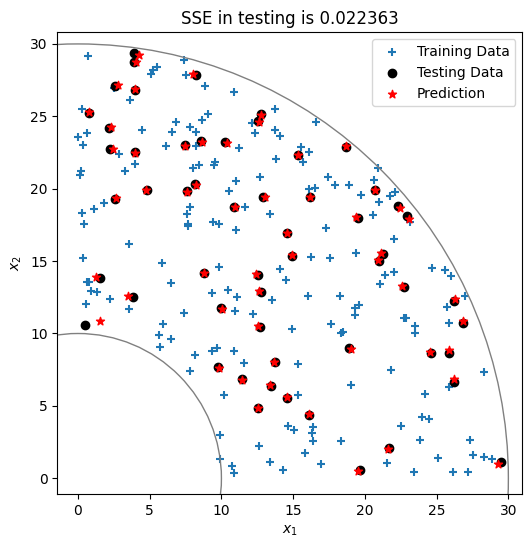

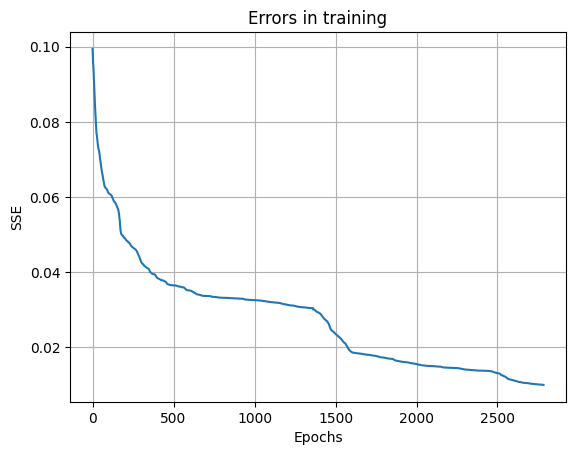

In [22]:
'''
This program use neural network modules from neurolab
which is similar to the counterpart in MATLAB.
'''
import sys
sys.path.append('../Lib/') # to use self-defined function
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
#from Lib_GenData import randsphere
from sklearn.model_selection import train_test_split

# ------ A simple example from menu ------------
# Create train samples
# input = np.random.uniform(-0.5, 0.5, (10, 2))
# target = (input[:, 0] + input[:, 1]).reshape(10, 1)
# # Create network with 2 inputs, 5 neurons in input layer and 1 in output layer
# net = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5]], [5, 1])
# # Train process
# err = net.train(input, target, epochs=500, show=100, goal=0.01) # show default value
# # simulate net
# target_hat = net.sim(input)
# ---------------------------------------------
from scipy.stats import uniform
N = 100
radius_in, radius_out =10, 30
X = uniform.rvs(loc = 0, scale = radius_out, size=(N, 2))
d = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
Idx = (d < radius_out) & (d > radius_in)
TrainData = X[(d < radius_out) & (d > radius_in), :]

import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt
def randsphere(center, radius, n_per_sphere):
  r = radius
  ndim = center.size
  x = np.random.normal(size=(n_per_sphere, ndim))
  ssq = np.sum(x ** 2, axis=1)
  fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
  frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
  p = center + np.multiply(x, frtiled)
  return p

# -----------------------------------------------------------------
# generate training data of Robot arms
l1, l2 = 20, 10
n = 1000
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.25)

theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
# --------------------------------------------------
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='0.5'))        
# --------------------------------------------------
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
# plt.savefig(img_dir + "neurolab_20_err.eps", format='eps')
plt.show()


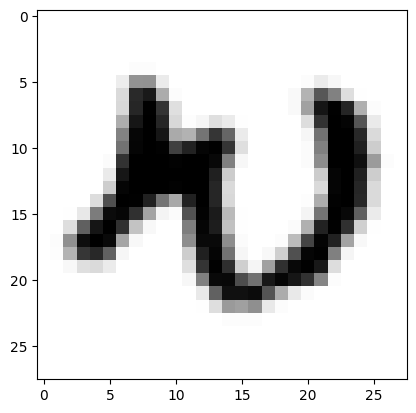

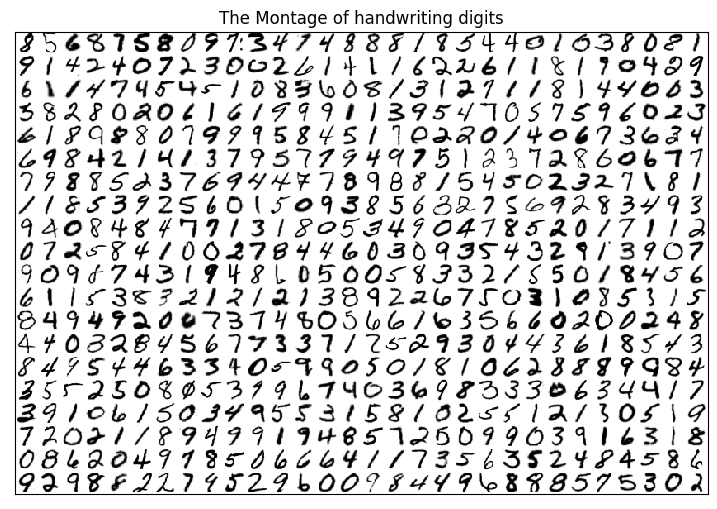

In [36]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
# X, y = fetch_openml("mnist_784", return_X_y = True) # X:70000*784 # y:70000
# mnist = fetch _openml("mnist_784", parser = "auto", version = 1)
# X = mnist.data
# y = mnist.target
# 找蒙太奇圖的資料表達方法

from scipy.io import loadmat
D = loadmat(data_dir + "Digits_train.mat")
X = D["X"]
y = D["y"]

Img = np.array(X)[3,:].reshape(28,28)
plt.imshow(Img, cmap = plt.cm.gray_r)
plt.show()

plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images
# 程式迴圈解釋見照片
n, m = 20, 30 # A n x m montage (total mn images)
sz = np.sqrt(X.shape[1]).astype("int") # image size sz x sz
M = np.zeros((m*sz, n*sz)) # montage image
A = X[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = A[i*n+j,:].reshape(sz, sz)

plt.imshow(M.T, cmap = plt.cm.gray_r, interpolation = "nearest")
plt.xticks([])
plt.yticks([])
plt.title("The Montage of handwriting digits")
#plt.savefig(img_dir + "pattern.eps", format='eps')
plt.show()


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
D = loadmat(data_dir + "Digits_train.mat")
X = D["X"]
y = D["y"]

# prepare data
X_train, X_test, y_train, y_test = \
train_test_split(X/255, y.ravel(), test_size = 0.25) #/255: 資料標準化
# setup and run

v = 200
hidden_layers = (v,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = "adam" # default solver

clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True,
activation = "logistic", tol = 1e-6, random_state = 0)
# default activation = ’relu’


clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print(y_test_hat)

Iteration 1, loss = 2.28856121
Iteration 2, loss = 2.08605529
Iteration 3, loss = 1.92080199
Iteration 4, loss = 1.76429776
Iteration 5, loss = 1.62257687
Iteration 6, loss = 1.49299131
Iteration 7, loss = 1.37930581
Iteration 8, loss = 1.27233176
Iteration 9, loss = 1.17663379
Iteration 10, loss = 1.09044616
Iteration 11, loss = 1.01193104
Iteration 12, loss = 0.94032653
Iteration 13, loss = 0.87713754
Iteration 14, loss = 0.81972855
Iteration 15, loss = 0.76698728
Iteration 16, loss = 0.72070488
Iteration 17, loss = 0.67791315
Iteration 18, loss = 0.64051985
Iteration 19, loss = 0.60557276
Iteration 20, loss = 0.57395970
Iteration 21, loss = 0.54511034
Iteration 22, loss = 0.51874684
Iteration 23, loss = 0.49506659
Iteration 24, loss = 0.47296314
Iteration 25, loss = 0.45192201
Iteration 26, loss = 0.43350122
Iteration 27, loss = 0.41588995
Iteration 28, loss = 0.39919792
Iteration 29, loss = 0.38506354
Iteration 30, loss = 0.37045272
Iteration 31, loss = 0.35690897
Iteration 32, los

In [56]:
#from sklearn.datasets import fetch_openml
#X, y = fetch_openml("mnist_784", version =1,\
#return_X_y = True)
D = loadmat(data_dir + "Digits_train_10000.mat")
X = D["X"]
y = D["y"]
# prepare data
X_train, X_test, y_train, y_test = \
train_test_split(X/255, y.ravel(), test_size = 0.25) #/255: 資料標準化
# setup and run

v = 120
hidden_layers = (v,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = "adam" # default solver

clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True,
activation = "logistic", tol = 1e-6, random_state = 0)
# default activation = ’relu’


clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
print(y_test_hat)


Iteration 1, loss = 1.84026066
Iteration 2, loss = 1.10791366
Iteration 3, loss = 0.72960096
Iteration 4, loss = 0.54035218
Iteration 5, loss = 0.43953120
Iteration 6, loss = 0.37805087
Iteration 7, loss = 0.33664473
Iteration 8, loss = 0.30597004
Iteration 9, loss = 0.28329016
Iteration 10, loss = 0.26502671
Iteration 11, loss = 0.24960635
Iteration 12, loss = 0.23592038
Iteration 13, loss = 0.22476441
Iteration 14, loss = 0.21475231
Iteration 15, loss = 0.20564751
Iteration 16, loss = 0.19654197
Iteration 17, loss = 0.19045587
Iteration 18, loss = 0.18202767
Iteration 19, loss = 0.17475108
Iteration 20, loss = 0.16840743
Iteration 21, loss = 0.16274906
Iteration 22, loss = 0.15755228
Iteration 23, loss = 0.15118863
Iteration 24, loss = 0.14621240
Iteration 25, loss = 0.14218737
Iteration 26, loss = 0.13684744
Iteration 27, loss = 0.13148879
Iteration 28, loss = 0.12748668
Iteration 29, loss = 0.12316063
Iteration 30, loss = 0.11902966
Iteration 31, loss = 0.11492603
Iteration 32, los

c:\Users\adfghkfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


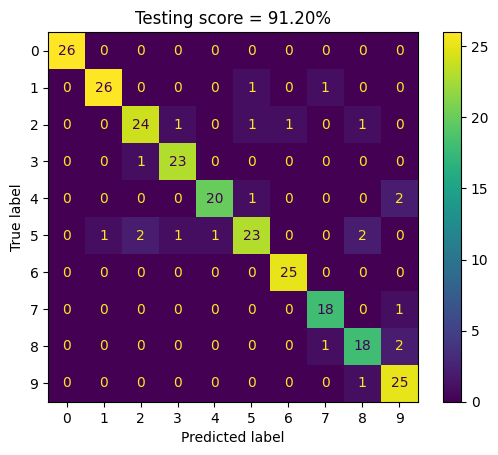

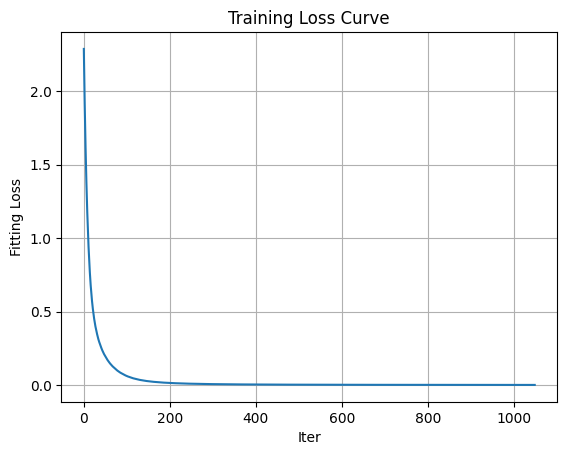

In [72]:
from sklearn.metrics import plot_confusion_matrix
#fig, axes = plt.subplots(1, 2, figsize = [12, 5])

score = clf.score(X_test, y_test)
# Confusion matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.title("Testing score = {:.2f}%".format(100*clf.score(X_test, y_test)))
#plt.savefig(img_dir + "class.eps", format='eps')
#plt.savefig(img_dir + "class10000.eps", format='eps')
plt.show()


plt.plot(clf.loss_curve_)
plt.grid(True)
plt.title("Training Loss Curve")
plt.xlabel("Iter")
plt.ylabel("Fitting Loss")

plt.show()

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.io import loadmat
D = loadmat(data_dir + "Digits_train.mat")
X = D["X"]
y = D["y"]

# prepare data
N = 2000
X_ = np.array(X)[:N, :]
y_ = np.array(y)[:N]

#set up and run ANN
hidden_layers = (30, )
X_train, X_test, y_train, y_test = \
    train_test_split(X_/255, y_, test_size = 0.25)

solver = "adam"
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True,
activation = "logistic", tol = 1e-6, random_state = 0)

# default activation = ’relu’
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
y_test_prob = clf.predict(X_test)
#print("accuracy for tested data : {:.2f}%".format(100*np.mean(y_test_hat)))
print("accuracy by score for tested data : {:.2f}%".format(100*clf.score(X_test, y_test)))

NameError: name 'data_dir' is not defined

In [11]:
#fig, axes = plt.subplots(1, 2, figsize = [10, 5])
title = "Training score = {:.2f}%".format(100*clf.score(X_train, y_train))
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    cmap = plt.cm.Blues,
    normalize="true"
)
disp.ax_.set_title(title)
plt.show()

title = "Testing score = {:.2f}%".format(100*clf.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap = plt.cm.Blues,
    normalize="true"
)
disp.ax_.set_title(title)
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined

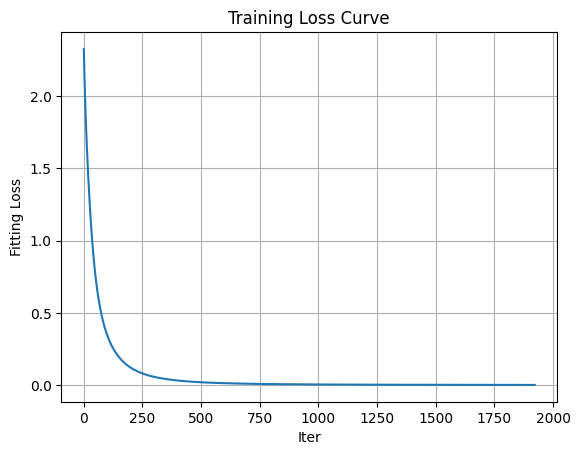

In [10]:
plt.plot(clf.loss_curve_)
plt.grid(True)
plt.title("Training Loss Curve")
plt.xlabel("Iter")
plt.ylabel("Fitting Loss")
plt.show()